<a href="https://colab.research.google.com/github/ShyamMuralidharan/Automatic-Ticket-Assignment-NLP/blob/Model-Build/Capstone_Project_Model_Build_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
### Pre Process the Data

In [258]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from langdetect import detect, detect_langs
#import googletrans
#from googletrans import Translator
import re
#import translate
from tensorflow.keras.preprocessing.text import Tokenizer
#from googletranslate import Translator
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words("english")) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [259]:
import socket    
hostname = socket.gethostname()    
IPAddr = socket.gethostbyname(hostname)    
print("Your Computer Name is:" + hostname)    
print("Your Computer IP Address is:" + IPAddr) 

Your Computer Name is:70ebdd6cedb0
Your Computer IP Address is:172.28.0.2


In [260]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [261]:
#### Use when running through google collab
from google.colab import drive
drive.mount('/drive', force_remount=True)

Mounted at /drive


In [0]:
project_path = "/drive/My Drive/Python Files"

In [0]:
# Please note that this Dataset has 4 more extra columns to identify the language and transilate to English
# Tried this transilation in Python using googletrans API but there is limitation on the numbers of calls, hence 
# googl sheets was used 
df = pd.read_excel(r'/drive/My Drive/Python Files/input_data.xlsx',sheet_name='Prasad Data',encoding="utf-8",dtype="str")

In [264]:
df.dtypes

Short description    object
Description          object
short_desc_lang      object
short_desc_en        object
description_lang     object
description_en       object
Caller               object
Assignment group     object
dtype: object

In [265]:
df.describe()

,Short description,Description,short_desc_lang,short_desc_en,description_lang,description_en,Caller,Assignment group
count,8492,8499,8492,8492,8497,8497,8500,8500
unique,7481,7817,50,7379,36,7752,2950,74
top,password reset,the,en,password reset,en,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,7613,48,7768,56,810,3976


In [266]:
# Load original dataset gven in the project 
df1 = pd.read_excel(r'/drive/My Drive/Python Files/input_data.xlsx',sheet_name='Original',encoding="utf-8",dtype="str")
df1.head(5)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [267]:
#Remove Junk charaters from the text.. below is an example
"ç­”å¤: ticket_no1559458 : wireless guest access- hr_tool trainer".encode('ascii','ignore').decode()

': ticket_no1559458 : wireless guest access- hr_tool trainer'

In [268]:
# We are going to use the DataFrame df for further processing 
df.describe()

,Short description,Description,short_desc_lang,short_desc_en,description_lang,description_en,Caller,Assignment group
count,8492,8499,8492,8492,8497,8497,8500,8500
unique,7481,7817,50,7379,36,7752,2950,74
top,password reset,the,en,password reset,en,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,7613,48,7768,56,810,3976


In [269]:
# There is Email ID in the Description field . we need to saperate this and store in another column 
#RegEx to find email form the text .. an example below
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", df["Description"][2])
print(emails)
my_str = "Hi my name is John and email address is john.doe@somecompany.co.uk and my friend's email is jane_doe124@gmail.com"
emails = re.findall("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)", my_str)
print(emails)


['eylqgodm.ybqkwiam@gmail.com']
['john.doe@somecompany.co.uk', 'jane_doe124@gmail.com']


In [270]:
#RegEx to remove spaces from the text.. an example below
t1 = '       Hello  World       From Pankaj \t\n\r\t \t /**  Hi There             '
print('Remove all spaces using RegEx:\n', re.sub(r"\s+", " ", df["Description"][2]), sep='')  # \s matches all white spaces

a = ' '.join([item for item in df["Description"][342].split() if '@' not in item])
b = re.sub(r"received from:","",a)

print(df["Short description"][223])
print (a,"  ",b)
#print(df["Description"][223])


Remove all spaces using RegEx:
 received from: eylqgodm.ybqkwiam@gmail.com hi i cannot log on to vpn best 
probleme mit bluescreen .
shortcut opening multiple folders    shortcut opening multiple folders


In [271]:
df.head(5)

,Short description,Description,short_desc_lang,short_desc_en,description_lang,description_en,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,en,login issue,en,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,en,outlook,en,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,en,cant log in to vpn,en,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,en,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,en,skype error,en,skype error,owlgqjme qhcozdfx,GRP_0


In [272]:
#Find and impute Null values from Short description 
df[pd.isnull(df["Short description"]) == True].index

Int64Index([2604, 3383, 3906, 3910, 3915, 3921, 3924, 4341], dtype='int64')

In [0]:
#Impute Null values of short description with the column 'Description'
for i in df[pd.isnull(df["Short description"]) == True].index :
  df["Short description"][i] = df["Description"][i]
  df["short_desc_lang"][i] = df["description_lang"][i]
  df["short_desc_en"][i] = df["description_en"][i]

In [274]:
# Find Null values in the field "Description"
df[pd.isnull(df["Description"]) == True].index

Int64Index([4395], dtype='int64')

In [0]:
# Impute Null values with "Short Description "
for i in df[pd.isnull(df["Description"]) == True].index :
  df["Description"][i] = df["Short description"][i]
  df["description_lang"][i] = df["short_desc_lang"][i]
  df["description_en"][i] = df["short_desc_en"][i]

In [0]:
for i in df[pd.isnull(df["description_lang"]) == True].index :
  df["Description"][i] = df["Short description"][i]
  df["description_lang"][i] = df["short_desc_lang"][i]
  df["description_en"][i] = df["short_desc_en"][i]

In [277]:
df.count()

Short description    8500
Description          8500
short_desc_lang      8500
short_desc_en        8500
description_lang     8500
description_en       8500
Caller               8500
Assignment group     8500
dtype: int64

In [278]:
#df["short_desc_lang"] = ""
#df["short_desc_en"] = ""
#df["description_lang"]=""
#df["description_en"] = ""
df["emails"] = ""
df["email_type"]=""
df["short_desc_spl"] = ""
df["description_spl"] = ""
df["short_desc_len"] = ""
df["description_len"] = ""
df["no_of_splch_removed1"]=""
df["no_of_splch_removed1_pct"]=""
df["no_of_splch_removed2"]=""
df["no_of_splch_removed2_pct"]=""
df["short_desc_en_spl"] = ""
df["description_en_spl"] = ""
df["short_desc_en_len"] = ""
df["description_en_len"] = ""
df["trimmed_words"] = ""
df["trimmed_words_len"] = ""
df["mark_for_delete"]=""

x = 0

for i in range(len(df)):  
  short_desc = str(df["Short description"][i]).encode('ascii','ignore').decode()
  df.loc[i,"no_of_splch_removed1"] = len(df["Short description"][i]) - len(str(df["Short description"][i]).encode('ascii','ignore').decode())
  df.loc[i,"no_of_splch_removed1_pct"] = np.round((df.loc[i,"no_of_splch_removed1"]*100 / len(df["Short description"][i])),1)
  desc = str(df["Description"][i]).encode('ascii','ignore').decode()
  df.loc[i,"no_of_splch_removed2"] = len(df["Description"][i]) - len(str(df["Description"][i]).encode('ascii','ignore').decode())
  df.loc[i,"no_of_splch_removed2_pct"] = np.round((df.loc[i,"no_of_splch_removed2"]*100 / len(df["Description"][i])),1)
    
  # The below Funtion is to transilate the sentances to English but this free API has miliation. Hence not used. 
  # We used the pre transilated input data (using Googl sheet)
  #if b == "en" :
  #      trn = Translator().translate(short_desc, dest = "en", src = "auto")
  #      short_desc_en = trn.text 
  #      trn1 = Translator().translate(desc, dest = "en", src = "auto")
  #      Description_en = trn1.text
  #else :
  
  #The below function is to remove Junk Characters from text 
  short_desc_en = str(df["short_desc_en"][i]).encode('ascii','ignore').decode()
  Description_en =str(df["description_en"][i]).encode('ascii','ignore').decode()
  
  # Finding the first Email Address from the 'Description' column. 
  if(len(re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", df["Description"][i]))) > 0:
      df.loc[i,"emails"] = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", df["Description"][i])[0]
    #df["emails"][i] = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", df["Description"][i])
  
  #Removing the Email ID from the short description ------------------------------------
  fltr_txt = ' '.join([item for item in short_desc.split() if '@' not in item])
  fltr_txt = re.sub(r"received from:","",fltr_txt)
  alpha = ""
  for char in fltr_txt:
    if char.isspace():
      alpha+= " "
    if char.isalnum():
      alpha+= char.lower()
  df.loc[i,"short_desc_spl"] = str(" ".join(alpha.split()))
  df.loc[i,"short_desc_len"] = len(alpha.split()) 
  #df.loc[i,"no_splch_removed"] = len(fltr_txt)-len(alpha.split())  
  #Removing the Email ID from the Description-------------------------------------------------
  fltr_txt1 = ' '.join([item for item in desc.split() if '@' not in item])
  fltr_txt1 = re.sub(r"received from:","",fltr_txt1)
  alpha1 = ""
  for char in fltr_txt1:
    if char.isspace():
      alpha1+= " "
    if char.isalnum():
      alpha1+= char.lower()
  df.loc[i,"description_spl"] = str(" ".join(alpha1.split()))
  df.loc[i,"description_len"] = len(alpha1.split())  
  #----------------------------   
  fltr_txt = ' '.join([item for item in short_desc_en.split() if '@' not in item])
  fltr_txt = re.sub(r"received from:","",fltr_txt)
  alpha = ""
  for char in fltr_txt:
    if char.isspace():
      alpha+= " "
    if char.isalnum():
      alpha+= char.lower()
  df.loc[i,"short_desc_en_spl"] = str(" ".join(alpha.split()))
  df.loc[i,"short_desc_en_len"] = len(alpha.split()) 
  #---------------------------------
  fltr_txt1 = ' '.join([item for item in Description_en.split() if '@' not in item])
  fltr_txt1 = re.sub(r"received from:","",fltr_txt1)
  alpha1 = ""
  for char in fltr_txt1:
    if char.isspace():
      alpha1+= " "
    if char.isalnum():
      alpha1+= char.lower()
  df.loc[i,"description_en_spl"] = str(" ".join(alpha1.split())) 
  df.loc[i,"description_en_len"] = len(alpha1.split())
  
  #--------------------------------------  
  # Final Text after stop word removal and combining both short and long description
  if df["short_desc_en_spl"][i] == df["description_en_spl"][i] : 
    df.loc[i,"trimmed_words"] = " ".join([item for item in df["short_desc_en_spl"][i].split() if item not in stop_words])
  else :
    df.loc[i,"trimmed_words"] = " ".join([item for item in df["short_desc_en_spl"][i].split() if item not in stop_words])+" "+" ".join([item for item in df["description_en_spl"][i].split() if item not in stop_words])
  #Mark records with lot of junk characters for  delete -----------------------------------------------
  df.loc[i,"trimmed_words_len"] = len(df["trimmed_words"][i].split())
  if df["trimmed_words_len"][i] <= 1:
    df.loc[i,"mark_for_delete"]= 1
  if df["no_of_splch_removed1_pct"][i]>50: # sentances with more than 50% junk
    df.loc[i,"mark_for_delete"]= 1
  #Progress Bar-----------------------------------------------------------------------------------------------------------
  if np.mod(i,1000) == 0:
    #print("\n")
    print(np.round((i*100/len(df))),"% ", end = "")
  if np.mod(i,100) == 0:
    print("=", end = "")
  

0.0 % ==========12.0 % ==========24.0 % ==========35.0 % ==========47.0 % ==========59.0 % ==========71.0 % ==========82.0 % ==========94.0 % =====

In [279]:
df["trimmed_words"][10]

'engineering tool says connected unable submit reports'

In [0]:
#Word Tokenizer
numword = 2000
t = Tokenizer(num_words=numword)
t.fit_on_texts((df["short_desc_en_spl"]))
t1 = Tokenizer(num_words=numword)
t1.fit_on_texts((df["description_en_spl"]))


In [0]:
#build a word Corpus
short_desc_words = pd.DataFrame()
short_desc_words["word_index"] = ""
short_desc_words["word"] = ""
short_desc_words["word_count"] = ""

desc_words = pd.DataFrame()
desc_words["word_index"] = ""
desc_words["word"] = ""
desc_words["word_count"] = ""


i = 0
for word in t.word_index:
    if not word in stop_words:
        if i<= 1500 :
            new_row = {'word_index':t.word_index[word], 'word':word, 'word_count':t.word_counts[word]}
            short_desc_words = short_desc_words.append(new_row, ignore_index=True)
            i = i+1

        
i = 0
for word in t1.word_index:
    if not word in stop_words:
        if i<= 1500 :
            new_row = {'word_index':t1.word_index[word], 'word':word, 'word_count':t1.word_counts[word]}
            desc_words = desc_words.append(new_row, ignore_index=True)
            i = i+1


In [282]:
short_desc_words

,word_index,word,word_count
0,5,job,978
1,7,jobscheduler,959
2,9,password,889
3,10,erp,854
4,11,failed,829
...,...,...,...
1496,1603,plug,3
1497,1604,previous,3
1498,1605,dns,3
1499,1606,hardcopy,3


In [283]:
desc_words

,word_index,word,word_count
0,9,please,2074
1,14,yesnona,1568
2,17,password,1205
3,20,user,1161
4,21,erp,1145
...,...,...,...
1496,1613,second,13
1497,1614,ph,13
1498,1615,sometimes,13
1499,1616,across,13


In [0]:
short_desc_words.to_csv("short_desc_words.csv")
desc_words.to_csv("desc_words.csv")

In [285]:
t.texts_to_sequences('job has'.split())

[[5], [88]]

In [286]:
t.word_index['job']

5

In [0]:
df["flg_account_related"]=0
df["flg_crm"]=0
df["flg_engineering"]=0
df["flg_erp"]=0
df["flg_failed"]=0
df["flg_help"]=0
df["flg_install"]=0
df["flg_job"]=0
df["flg_laptop"]=0
df["flg_mobile"]=0
df["flg_network"]=0
df["flg_outlook"]=0
df["flg_printer"]=0
df["flg_skype"]=0
df["flg_ticket_update"]=0
df["flg_vpn"]=0
df["flg_windows"]=0
df["host_related"]=0
df["mobile"]=0
df["blank_call"]=0
df["setup_ws"]=0

In [288]:

for i in range(len(df)):
#---------------------------------------------------------------------
    if df["emails"][i].find("gmail") >= 0:
        df.loc[i,"email_type"] = "gmail"
    else: 
        if df["emails"][i].find("monitoring_tool@") >=0:
            df.loc[i,"email_type"] = "monitoring_tool"
        else:
            if df["emails"][i].find("company") >=0:
                df.loc[i,"email_type"] = "company"
            else :
                df.loc[i,"email_type"] = "others"
    
    if df["trimmed_words"][i].find("access") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("account") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("locked") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("login") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("logon") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("password") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("passwordmanagementtool") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("passwords") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("reset") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("tologin") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("unlock") >= 0 :
        df.loc[i,"flg_account_related"] = 1
    if df["trimmed_words"][i].find("user") >= 0 :
        df.loc[i,"flg_account_related"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("circuit") >= 0 :
        df.loc[i,"flg_network"] = 1
    if df["trimmed_words"][i].find("connection") >= 0 :
        df.loc[i,"flg_network"] = 1
    if df["trimmed_words"][i].find("network") >= 0 :
        df.loc[i,"flg_network"] = 1
    if df["trimmed_words"][i].find("outage") >= 0 :
        df.loc[i,"flg_network"] = 1
    if df["trimmed_words"][i].find("server") >= 0 :
        df.loc[i,"flg_network"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("vpn") >= 0 :
        df.loc[i,"flg_vpn"] = 1
    if df["trimmed_words"][i].find("vpncompanycom") >= 0 :
        df.loc[i,"flg_vpn"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("computer") >= 0 :
        df.loc[i,"flg_laptop"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("crm") >= 0 :
        df.loc[i,"flg_crm"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("email") >= 0 :
        df.loc[i,"flg_outlook"] = 1
    if df["trimmed_words"][i].find("emails") >= 0 :
        df.loc[i,"flg_outlook"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("outlook") >= 0 :
        df.loc[i,"flg_outlook"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("error") >= 0 :
        df.loc[i,"flg_failed"] = 1
    if df["trimmed_words"][i].find("failed") >= 0 :
        df.loc[i,"flg_failed"] = 1
    if df["trimmed_words"][i].find("issue") >= 0 :
        df.loc[i,"flg_failed"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("engineering") >= 0 :
        df.loc[i,"flg_engineering"] = 1
    if df["trimmed_words"][i].find("engineeringtool") >= 0 :
        df.loc[i,"flg_engineering"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("erp") >= 0 :
        df.loc[i,"flg_erp"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("help") >= 0 :
        df.loc[i,"flg_help"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("install") >= 0 :
        df.loc[i,"flg_install"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("job") >= 0 :
        df.loc[i,"flg_job"] = 1
    if df["trimmed_words"][i].find("jobscheduler") >= 0 :
        df.loc[i,"flg_job"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("laptop") >= 0 :
        df.loc[i,"flg_laptop"] = 1
    if df["trimmed_words"][i].find("pc") >= 0 :
        df.loc[i,"flg_laptop"] = 1    
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("phone") >= 0 :
        df.loc[i,"flg_mobile"] = 1
    if df["trimmed_words"][i].find("telephonysoftware") >= 0 :
        df.loc[i,"flg_mobile"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("print") >= 0 :
        df.loc[i,"flg_printer"] = 1
    if df["trimmed_words"][i].find("printer") >= 0 :
        df.loc[i,"flg_printer"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("skype") >= 0 :
        df.loc[i,"flg_skype"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("problems") >= 0 :
        df.loc[i,"flg_failed"] = 1
    if df["trimmed_words"][i].find("unable") >= 0 :
        df.loc[i,"flg_failed"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("ticket") >= 0 :
        df.loc[i,"flg_ticket_update"] = 1
    if df["trimmed_words"][i].find("update") >= 0 :
        df.loc[i,"flg_ticket_update"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("windows") >= 0 :
        df.loc[i,"flg_windows"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("hostname") >= 0 :
        df.loc[i,"host_related"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("mobile") >= 0 :
        df.loc[i,"mobile"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("blank call") >= 0 :
        df.loc[i,"blank_call"] = 1
#---------------------------------------------------------------------    
    if df["trimmed_words"][i].find("setup new ws") >= 0 :
        df.loc[i,"setup_ws"] = 1
#---------------------------------------------------------------------    
    if np.mod(i,1000) == 0:
     #print("\n")
      print(np.round((i*100/len(df))),"% ", end = "")
    if np.mod(i,100) == 0:
      print("=", end = "")
  

0.0 % ==========12.0 % ==========24.0 % ==========35.0 % ==========47.0 % ==========59.0 % ==========71.0 % ==========82.0 % ==========94.0 % =====

In [289]:
df.dtypes

Short description           object
Description                 object
short_desc_lang             object
short_desc_en               object
description_lang            object
description_en              object
Caller                      object
Assignment group            object
emails                      object
email_type                  object
short_desc_spl              object
description_spl             object
short_desc_len              object
description_len             object
no_of_splch_removed1        object
no_of_splch_removed1_pct    object
no_of_splch_removed2        object
no_of_splch_removed2_pct    object
short_desc_en_spl           object
description_en_spl          object
short_desc_en_len           object
description_en_len          object
trimmed_words               object
trimmed_words_len           object
mark_for_delete             object
flg_account_related          int64
flg_crm                      int64
flg_engineering              int64
flg_erp             

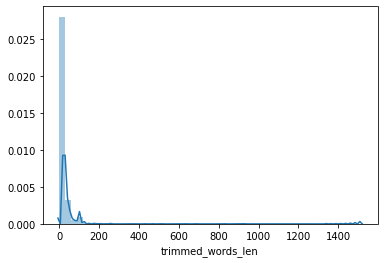

In [290]:
sns.distplot(df["trimmed_words_len"])

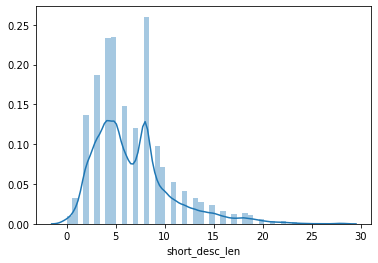

In [291]:
sns.distplot(df["short_desc_len"])

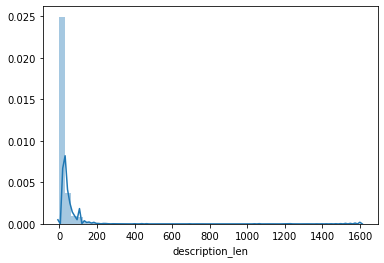

In [292]:
sns.distplot(df["description_len"])

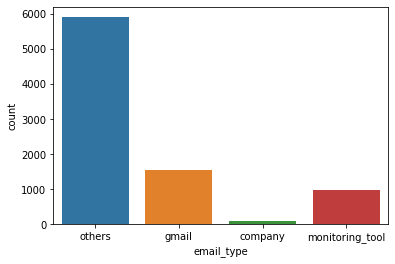

In [293]:
sns.countplot(df["email_type"])

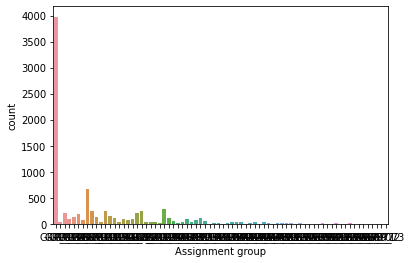

In [294]:
sns.countplot(df["Assignment group"])

In [295]:
a = df.groupby("Assignment group")
a["Assignment group"].count().sort_values(ascending = False)

Assignment group
GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_61       1
GRP_73       1
GRP_35       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64

In [296]:
b = df.groupby("Short description")
print(b["Short description"].count().sort_values(ascending = False).head(10))

Short description
password reset               38
windows password reset       29
account locked in ad         24
windows account locked       23
erp SID_34 account unlock    19
login issue                  18
blank call                   18
account locked.              18
unable to connect to vpn     18
account unlock               17
Name: Short description, dtype: int64


In [297]:
b = df.groupby("Caller")
print(b["Caller"].count().sort_values(ascending = False).head(10))

Caller
bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
jloygrwh acvztedi     64
spxqmiry zpwgoqju     63
oldrctiu bxurpsyi     57
olckhmvx pcqobjnd     54
dkmcfreg anwmfvlg     51
Name: Caller, dtype: int64


In [298]:
df[df["mark_for_delete"]==1][["Short description","Description","trimmed_words","description_en_len","description_en_spl","trimmed_words_len","no_of_splch_removed1"]]

,Short description,Description,trimmed_words,description_en_len,description_en_spl,trimmed_words_len,no_of_splch_removed1
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...,"from: \nsent: friday, october 28, 2016 7:20 a...",shipment notification sent friday october 28 2...,27,from sent friday october 28 2016 720 am to nwf...,24,30
276,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...,outlook c folder folderoffice,4,outlook c folder folderoffice,4,48
469,ieæµè§ˆå™¨æ‰“å¼€crmç³»ç»ŸåŽæç¤ºç”¨æˆ·å·²è¢...,ieæµè§ˆå™¨æ‰“å¼€crmç³»ç»ŸåŽæç¤ºç”¨æˆ·å·²è¢...,ie crm zae crm ya,6,ie crm there zae crm ya,5,72
487,msd - office 2013 outlook æ‰“ä¸å¼€ï¼Œæ˜¾ç¤ºæ—...,please provide details of the issue.\n[â€Ž2016...,msd office 2013 outlook cs please provide deta...,38,please provide details of the issue 2016 z10 z...,37,54
618,outlookæ‰“ä¸å¼€,æ‰“å¼€outlookæ—¶ï¼Œæ˜¾ç¤ºoutlook.ostæ–‡ä»¶é”™è...,outlook outlookoutlookost,2,outlookoutlookost is,2,9
...,...,...,...,...,...,...,...
8266,erpæ— æ³•è¿›è¡Œé‡‡è´­ï¼ˆè½¬ç»™è´ºæ­£å¹³ï¼‰,"è¿›è¡Œé‡‡è´­æ—¶æ˜¾ç¤º""æ‰¾ä¸åˆ°å‘˜å·¥111115483...",erp 1111154833 scy c,4,1111154833 is scy c,4,39
8270,å¯†ç æ›´æ”¹åŽï¼Œoutlookæ— æ³•ç™»é™†,å¯†ç æ›´æ”¹åŽï¼Œoutlookæ— æ³•ç™»é™†,outlook,3,the outlook is,1,30
8457,æ— æ³•ç™»é™†hr_toolè€ƒå‹¤ç³»ç»Ÿ,æ˜¾ç¤ºjavaæ’ä»¶æ— æ³•åŠ è½½ï¼Œæ‰€éœ€ç‰ˆæœ¬1.8...,hrtool java pushkin 18045,5,java as pushkin 18045 is,4,24
8465,vpn è¿žæŽ¥ä¸ä¸Š,vpnè¿žä¸ä¸Šï¼Œè¯·è½¬ç»™ è´ºæ­£å¹³ atcbvglq.bd...,vpn vpn,1,vpn,2,12


In [0]:
df.to_excel("processed_data.xlsx")

## Summary of Columns : 

* Input file was loaded into a DataFrame. 
* It was observed that there are some records whcih are not in English. Tried to use googletran/ Transilator package in Python. However, they have limitation for no of free calls. Hence, loaded the data into google sheets and transilated
* In order to proces the data several new columns were created to undersatnd the no of special characters..etc
* Using tokenizer, word corpus was built with Max 1500 words. 
* Both short and long description was combined after removing special characters/ transilation to english/ applying Tokenizer
* Records where more than 50% characters are junk are marked for delete
* below is the list of new columns created


![image.png](attachment:image.png)


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Short description         8500 non-null   object
 1   Description               8500 non-null   object
 2   short_desc_lang           8500 non-null   object
 3   short_desc_en             8500 non-null   object
 4   description_lang          8500 non-null   object
 5   description_en            8500 non-null   object
 6   Caller                    8500 non-null   object
 7   Assignment group          8500 non-null   object
 8   emails                    8500 non-null   object
 9   email_type                8500 non-null   object
 10  short_desc_spl            8500 non-null   object
 11  description_spl           8500 non-null   object
 12  short_desc_len            8500 non-null   object
 13  description_len           8500 non-null   object
 14  no_of_splch_removed1    

In [301]:
df['trimmed_words']

0       login issue verified user detailsemployee mana...
1       outlook hello team meetingsskype meetings etc ...
2                     cant log vpn hi cannot log vpn best
3                               unable access hrtool page
4                                             skype error
                              ...                        
8495    emails coming zz mail good afternoon receiving...
8496                              telephonysoftware issue
8497        vip2 windows password reset tifpdchb pedxruyf
8498    na machine running est unable access machine u...
8499    various prgramdntyme open several pcs various ...
Name: trimmed_words, Length: 8500, dtype: object

In [0]:
from sklearn.model_selection import train_test_split
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__
from tensorflow import keras
from keras.layers import InputLayer
from tensorflow.python.keras.layers import Dense, GRU,Embedding,LSTM, Input, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,TimeDistributed
from tensorflow.python.keras.layers import Dropout
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [0]:
#df_mod_X=df[['short_desc_en_spl','description_en_spl','Caller']]
df_mod_X=df['trimmed_words']
df_mod_y=df['Assignment group']

In [304]:
df_mod_X

0       login issue verified user detailsemployee mana...
1       outlook hello team meetingsskype meetings etc ...
2                     cant log vpn hi cannot log vpn best
3                               unable access hrtool page
4                                             skype error
                              ...                        
8495    emails coming zz mail good afternoon receiving...
8496                              telephonysoftware issue
8497        vip2 windows password reset tifpdchb pedxruyf
8498    na machine running est unable access machine u...
8499    various prgramdntyme open several pcs various ...
Name: trimmed_words, Length: 8500, dtype: object

In [305]:
t.texts_to_sequences(df_mod_X)

[[21,
  17,
  30,
  128,
  255,
  30,
  255,
  124,
  15,
  9,
  30,
  21,
  137,
  872,
  823,
  72,
  21,
  17,
  835],
 [20, 839, 219, 565, 849, 20, 511, 31, 1789, 886],
 [118, 70, 33, 1272, 61, 70, 33],
 [14, 18, 127, 282],
 [35, 28],
 [14, 70, 86, 67, 35],
 [535, 619, 325, 535, 619, 325, 1127],
 [1223, 180, 49, 1224, 536, 182, 255],
 [14, 1036, 168, 20],
 [43, 32],
 [86, 67, 620, 245, 14, 337, 301],
 [127, 76, 269, 282, 671],
 [14, 21, 127, 1501],
 [30, 577, 15, 9],
 [14, 55, 834],
 [43, 32],
 [14,
  21,
  44,
  33,
  1272,
  14,
  21,
  44,
  33,
  585,
  225,
  55,
  49,
  1594,
  66,
  151,
  72,
  106,
  297,
  59,
  699,
  25,
  293,
  1510,
  280,
  1074,
  1369],
 [79, 136, 738, 302],
 [10, 26, 16, 24],
 [14, 211, 33],
 [14, 137, 834],
 [33,
  17,
  839,
  72,
  57,
  33,
  293,
  109,
  461,
  928,
  245,
  25,
  603,
  115,
  111,
  1594,
  258,
  973,
  151,
  787,
  36,
  59,
  362,
  40,
  973,
  941,
  1489,
  766,
  362,
  40,
  973],
 [14, 57, 33],
 [30, 273, 495, 8

In [0]:
df_mod_X1 = t.texts_to_sequences(df_mod_X)
df_mod_X2 = pad_sequences(df_mod_X1, maxlen=200, padding = 'post', truncating = 'post') 

In [307]:
df_mod_X2.shape

(8500, 200)

In [0]:
a = pd.DataFrame(df["Assignment group"].unique())

In [309]:
a[0]

0      GRP_0
1      GRP_1
2      GRP_3
3      GRP_4
4      GRP_5
       ...  
69    GRP_69
70    GRP_70
71    GRP_71
72    GRP_72
73    GRP_73
Name: 0, Length: 74, dtype: object

In [0]:
values = df["Assignment group"]

In [0]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

In [312]:
label_encoder.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
       'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36',
       'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41',
       'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47',
       'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58',
       'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63',
       'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69',
       'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9'],
      dtype=object)

In [0]:
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [314]:
print("Shape of OneHot encoded",onehot_encoded.shape)
df_mod_y=onehot_encoded

Shape of OneHot encoded (8500, 74)


In [315]:
# Split features into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(df_mod_X2, df_mod_y, test_size=0.20, random_state=42)
# Print the share of the training and validation sets
print("Shape of Training set :",X_train.shape," / ", y_train.shape)
print("Shape of Validation set :",X_valid.shape," / ", y_valid.shape)

Shape of Training set : (6800, 200)  /  (6800, 74)
Shape of Validation set : (1700, 200)  /  (1700, 74)


In [0]:
max_features = 10000
maxlen = 200 #len(df_mod_X['description_en_spl'].max()) #Assign the Max length of a sentence to the variable. #926 #25
embedding_size = 200

In [0]:
input = Input(shape=(maxlen,)) # Input layer
model = Embedding(t.num_words,embedding_size, input_length=maxlen,trainable = True)(input) # Word embedding layer #, output_dim=50
model = Dropout(0.1)(model) # Dropout
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model) # Bi-directional LSTM layer
model = Flatten()(model)
#out = TimeDistributed(Dense(5, activation="softmax"))(model)  # softmax output layer
model = Dropout(rate=DROPOUT_RATE)(model)
out = Dense(74, activation="sigmoid")(model)  # softmax output layer
#out = Dropout(rate=DROPOUT_RATE, input_shape=input_shape)(model)

In [335]:
model = Model(input, out) # Complete model
model.summary()

Model: "functional_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 200)]             0         
_________________________________________________________________
embedding_38 (Embedding)     (None, 200, 200)          400000    
_________________________________________________________________
dropout_48 (Dropout)         (None, 200, 200)          0         
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 200, 200)          240800    
_________________________________________________________________
flatten_35 (Flatten)         (None, 40000)             0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 40000)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 74)              

In [0]:
LEARNING_RATE = 1e-3

loss = 'binary_crossentropy'#'sparse_categorical_crossentropy'
optimizer = tensorflow.keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss=loss, metrics=['acc'])

In [337]:
EPOCHS = 5
BATCH_SIZE = 100

# Create callback for early stopping on validation loss. If the loss does
# not decrease on two consecutive tries, stop training
callbacks = [tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)]

# Train and validate model
# To start training, call the model.fit method—the model is "fit" to the training data.
# Note that fit() will return a History object which we can use to plot training vs. validation accuracy and loss.
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_valid, y_valid), verbose=1, batch_size=BATCH_SIZE, callbacks=callbacks)

Epoch 1/5
68/68 [==============================] - 54s 795ms/step - loss: 0.0703 - acc: 0.4688 - val_loss: 0.0432 - val_acc: 0.5047
Epoch 2/5
68/68 [==============================] - 54s 789ms/step - loss: 0.0378 - acc: 0.5512 - val_loss: 0.0381 - val_acc: 0.5206
Epoch 3/5
68/68 [==============================] - 54s 789ms/step - loss: 0.0337 - acc: 0.5888 - val_loss: 0.0345 - val_acc: 0.5641
Epoch 4/5
68/68 [==============================] - 52s 767ms/step - loss: 0.0297 - acc: 0.6300 - val_loss: 0.0322 - val_acc: 0.5912
Epoch 5/5
68/68 [==============================] - 53s 785ms/step - loss: 0.0262 - acc: 0.6700 - val_loss: 0.0304 - val_acc: 0.6359
